In [28]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV

# Questions 1, 2, 3, 4

In [51]:
mnist_train = pd.read_csv("/users/2024/ds2/118004830/Bureau/Donnees_knn/mnist_train.csv")
mnist_test = pd.read_csv("/users/2024/ds2/118004830/Bureau/Donnees_knn/mnist_test.csv")

In [30]:
# Création des échantillons de test et d'entrainement
Xtrain = mnist_train.drop(columns=['5'])  
Ytrain = mnist_train['5']  

Xtest = mnist_test.drop(columns=['7'])  
Ytest = mnist_test['7']  

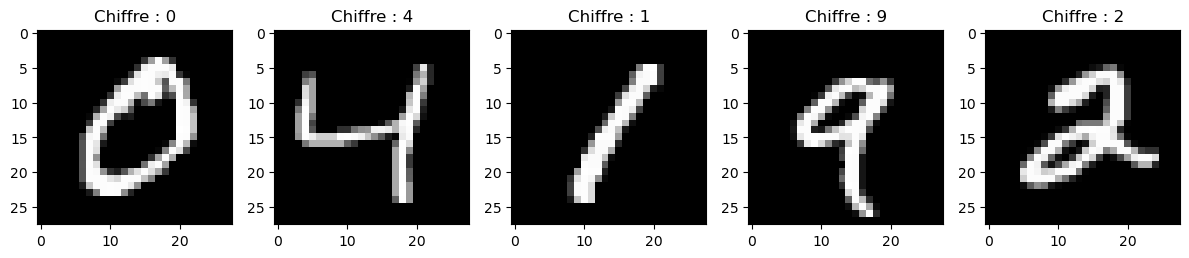

In [52]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))    # plot les 5 à côté

for i in range(5):
    image = Xtrain.iloc[i] 
    image_matrix = image.values.reshape(28, 28)
    axes[i].imshow(image_matrix, cmap='gray')
    axes[i].set_title(f"Chiffre : {Ytrain.iloc[i]}")  

plt.tight_layout()
plt.show()


In [32]:
# On réduit la taille de l'échantillon à 12k observations
subset_size = 12000
Xtrain_sub = Xtrain.sample(n=subset_size, random_state=42)
Ytrain_sub = Ytrain.loc[Xtrain_sub.index]

# Question 5

/usr/lib64/python3.11/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.620
- 0.621
- 0.622
- ...
Feature names seen at fit time, yet now missing:
- 1.1
- 107
- 108
- 11
- 11.1
- ...

  warnings.warn(message, FutureWarning)


Accuracy du modèle K-NN : 0.94


/usr/lib64/python3.11/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.620
- 0.621
- 0.622
- ...
Feature names seen at fit time, yet now missing:
- 1.1
- 107
- 108
- 11
- 11.1
- ...

  warnings.warn(message, FutureWarning)
/usr/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/lib64/python3.11/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.6

Accuracy du modèle K-NN final : 94.8%


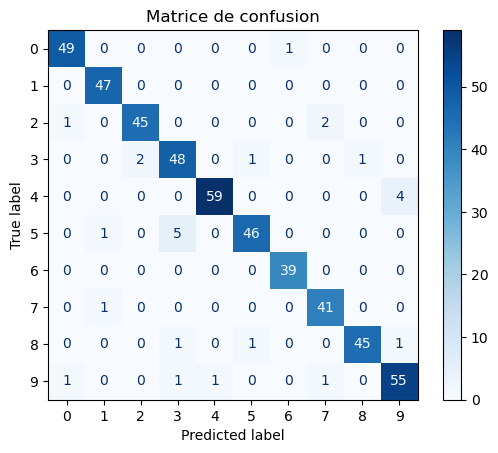

In [53]:
subset_size_test = 500
Xtest_sub = Xtest.sample(n=subset_size_test, random_state=42)
Ytest_sub = Ytest.loc[Xtest_sub.index]

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xtrain_sub, Ytrain_sub)

predictions = knn.predict(Xtest_sub)

accuracy = accuracy_score(Ytest_sub, predictions)
print("Accuracy du modèle K-NN : {:.2f}".format(accuracy))

# Validation croisée avec 5 sous-parties
parameters = {'n_neighbors': range(1, 15)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=5) 
clf.fit(Xtrain_sub, Ytrain_sub)

# Entraînez un modèle final avec le meilleur nombre de voisins.
best_k = clf.best_params_['n_neighbors']
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(Xtrain_sub, Ytrain_sub)

# Évaluez les performances du modèle final sur le sous-échantillon de test.
final_predictions = final_knn.predict(Xtest_sub)
final_accuracy = accuracy_score(Ytest_sub, final_predictions)
print(f"Accuracy du modèle K-NN final : {round(final_accuracy, 4) * 100}%")

# Matrice de confusion
plot_confusion_matrix(final_knn, Xtest_sub, Ytest_sub, cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

/usr/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/lib64/python3.11/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.620
- 0.621
- 0.622
- ...
Feature names seen at fit time, yet now missing:
- 1.1
- 107
- 108
- 11
- 11.1
- ...

  warnings.warn(message, FutureWarning)


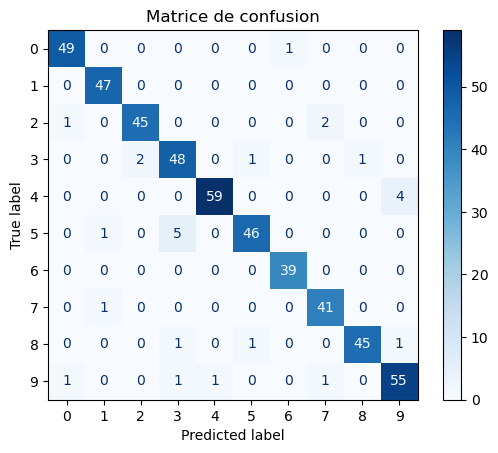

In [37]:
plot_confusion_matrix(final_knn, Xtest_sub, Ytest_sub, cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [40]:
print(f"Final accuracy score: {accuracy_score(Ytest_sub, final_predictions) * 100:.3f}%")

Final accuracy score: 94.800%


# Question 5
touche personnelle

# Question 6

/usr/lib64/python3.11/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.620
- 0.621
- 0.622
- ...
Feature names seen at fit time, yet now missing:
- 1.1
- 107
- 108
- 11
- 11.1
- ...

  warnings.warn(message, FutureWarning)
/usr/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/lib64/python3.11/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.6

Accuracy du modèle K-NN avec pondération : 0.95
Erreur de classification avec pondération : 0.05


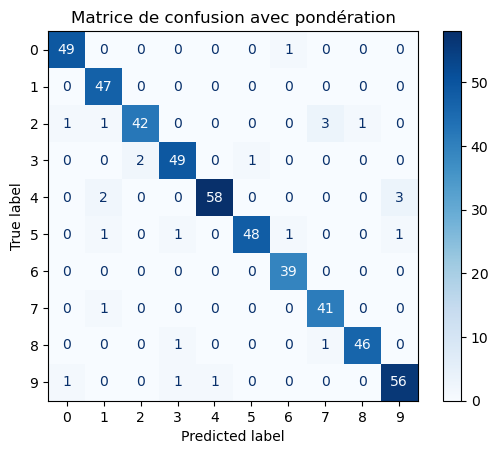

Accuracy du modèle K-NN avec pondération : 95.000%


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Créez et entraînez un modèle K-NN avec k=10 et des poids basés sur la distance.
knn_weighted = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_weighted.fit(Xtrain_sub, Ytrain_sub)

# Effectuez des prédictions sur le sous-échantillon de test.
predictions_weighted = knn_weighted.predict(Xtest_sub)

# Évaluez les performances du modèle K-NN avec pondération en fonction de la distance.
accuracy_weighted = accuracy_score(Ytest_sub, predictions_weighted)
print("Accuracy du modèle K-NN avec pondération : {:.2f}".format(accuracy_weighted))
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Calculez l'erreur de classification (accuracy inverse) avec pondération.
classification_error_weighted = 1 - accuracy_weighted
print("Erreur de classification avec pondération : {:.2f}".format(classification_error_weighted))

# Affichez la matrice de confusion avec pondération.
plot_confusion_matrix(knn_weighted, Xtest_sub, Ytest_sub, cmap='Blues')
plt.title("Matrice de confusion avec pondération")
plt.show()

# Affichez le score d'accuracy du modèle K-NN avec pondération en pourcentage.
print(f"Accuracy du modèle K-NN avec pondération : {accuracy_weighted * 100:.3f}%")


In [45]:
# Créez et entraînez un modèle K-NN avec k=10 en utilisant la pondération personnalisée.
k = 10
predictions_custom_weighted = []

for i in range(len(Xtest_sub)):
    distances = np.sqrt(((Xtrain_sub - Xtest_sub.iloc[i])**2).sum(axis=1))
    sorted_indices = np.argsort(distances)
    nearest_neighbors = sorted_indices[:k]
    
    # Réinitialisez les indices pour éviter les problèmes d'indice.
    nearest_neighbors = Xtrain_sub.index[nearest_neighbors]
    
    # Calculer les poids en utilisant la fonction de pondération personnalisée.
    weights = custom_weight(distances[nearest_neighbors])

    # Vote pondéré des voisins.
    labels = Ytrain_sub.loc[nearest_neighbors]
    unique_labels = np.unique(labels)
    weighted_votes = {label: sum(weights[labels == label]) for label in unique_labels}
    predicted_label = max(weighted_votes, key=weighted_votes.get)

    predictions_custom_weighted.append(predicted_label)

# Évaluez les performances du modèle K-NN avec pondération personnalisée.
accuracy_custom_weighted = accuracy_score(Ytest_sub, predictions_custom_weighted)
print("Accuracy du modèle K-NN avec pondération personnalisée : {:.2f}".format(accuracy_custom_weighted))


Accuracy du modèle K-NN avec pondération personnalisée : 0.25


In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Définissez une fonction de pondération personnalisée basée sur les règles spécifiées.
def custom_weight(distance):
    sorted_distances = np.sort(distance)
    weights = []

    for d in distance:
        if d in sorted_distances[:3]:
            weights.append(1.0)
        elif d in sorted_distances[3:6]:
            weights.append(0.5)
        else:
            weights.append(0.25)

    return weights

# Créez un objet KFold pour effectuer la validation croisée.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Stockez les scores d'accuracy et les matrices de confusion pour chaque fold.
accuracy_scores = []
confusion_matrices = []

for train_index, test_index in kf.split(Xtrain_sub):
    X_train_fold, X_test_fold = Xtrain_sub.iloc[train_index], Xtrain_sub.iloc[test_index]
    Y_train_fold, Y_test_fold = Ytrain_sub.iloc[train_index], Ytrain_sub.iloc[test_index]

    # Créez et entraînez un modèle K-NN avec k=10 en utilisant la pondération personnalisée.
    k = 10
    predictions_custom_weighted = []

    for i in range(len(X_test_fold)):
        distances = np.sqrt(((X_train_fold - X_test_fold.iloc[i])**2).sum(axis=1))
        sorted_indices = np.argsort(distances)
        nearest_neighbors = sorted_indices[:k]

        # Réinitialisez les indices pour éviter les problèmes d'indice.
        nearest_neighbors = X_train_fold.index[nearest_neighbors]

        # Calculer les poids en utilisant la fonction de pondération personnalisée.
        weights = custom_weight(distances[nearest_neighbors])

        # Vote pondéré des voisins.
        labels = Y_train_fold.loc[nearest_neighbors]
        unique_labels = np.unique(labels)

        # Créez un dictionnaire pour stocker les poids pondérés par classe.
        weighted_votes = {label: 0 for label in unique_labels}

        for label in unique_labels:
            for neighbor, weight in zip(labels, weights):
                if neighbor == label:
                    weighted_votes[label] += weight

        predicted_label = max(weighted_votes, key=weighted_votes.get)

        predictions_custom_weighted.append(predicted_label)

    # Évaluez les performances du modèle K-NN avec pondération personnalisée.
    accuracy_custom_weighted = accuracy_score(Y_test_fold, predictions_custom_weighted)
    accuracy_scores.append(accuracy_custom_weighted)

    # Calculez et stockez la matrice de confusion.
    confusion = confusion_matrix(Y_test_fold, predictions_custom_weighted)
    confusion_matrices.append(confusion)

# Calculez la moyenne des scores d'accuracy de la validation croisée.
average_accuracy = np.mean(accuracy_scores)
print("Moyenne de l'accuracy avec validation croisée : {:.2f}".format(average_accuracy))

# Affichez les matrices de confusion pour chaque fold.
for i, confusion in enumerate(confusion_matrices):
    print(f"Matrice de confusion pour Fold {i + 1}:\n{confusion}")


Moyenne de l'accuracy avec validation croisée : 0.95
Matrice de confusion pour Fold 1:
[[245   0   1   0   0   1   0   0   0   0]
 [  0 255   1   1   0   0   0   1   0   0]
 [  6   9 213   1   1   0   0   5   1   0]
 [  1   2   3 243   0   6   2   2   2   2]
 [  1   1   0   0 212   0   2   0   0  11]
 [  0   1   0   5   1 220   2   0   0   1]
 [  1   1   0   0   0   4 222   0   0   0]
 [  2   6   0   0   3   0   0 210   0   5]
 [  0   8   0   7   2   8   0   3 225   6]
 [  1   2   0   0   2   0   0   5   0 216]]
Matrice de confusion pour Fold 2:
[[211   0   0   0   0   1   1   0   0   0]
 [  0 256   0   0   1   0   0   0   0   0]
 [  1   6 227   1   2   0   0   9   1   1]
 [  1   3   3 212   0   4   0   2   1   4]
 [  0   3   0   0 247   0   1   0   0  10]
 [  2   1   1   2   0 215   1   0   0   1]
 [  1   0   0   0   0   0 243   0   0   0]
 [  0   5   2   0   1   0   0 253   0   4]
 [  0   6   0   6   1  11   1   1 201   4]
 [  1   0   0   3   8   0   0   8   0 208]]
Matrice de confus

In [39]:
print(f"Final accuracy score: {accuracy_score(y_test, y_pred)*100:.3f}%")

NameError: name 'y_test' is not defined

> Note: random_state